In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Регрессия

In [99]:
data = pd.read_csv("housing_price.csv",encoding="ansi")
pd.set_option("display.max.columns", None)
data


C:\Users\Admin\AppData\Local\Temp\ipykernel_16476\672729083.py:1: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("housing_price.csv",encoding="ansi")


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,131.00,2,1,1,1,ёЯ 26,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,132.38,2,2,1,2,ёЯ 22,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,198.00,3,2,1,3,ЦР 4,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,134.00,3,1,1,1,µЧ 21,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,81.00,2,1,1,1,ЦР 6,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,https://bj.lianjia.com/chengjiao/BJYZ92311192....,BJYZ92311192,116.546899,39.755236,1111027377053,2016-06-10,1.0,8,350.0,20580,170.07,3,2,1,2,ЦР 5,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,36545.0
318847,https://bj.lianjia.com/chengjiao/BJYZ92320171....,BJYZ92320171,116.497474,39.810115,1111027377957,2016-06-10,NaN,1,108.8,31006,35.09,1,0,1,1,ЦР 24,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,54282.0
318848,https://bj.lianjia.com/chengjiao/BJYZ92324217....,BJYZ92324217,116.497256,39.804081,1111027380056,2016-06-05,1.0,2,359.0,35138,102.17,2,2,1,2,ЦР 7,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,46927.0
318849,https://bj.lianjia.com/chengjiao/BJYZ92333313....,BJYZ92333313,116.501794,39.799347,1111027377054,2016-06-12,NaN,4,720.0,40373,178.34,4,2,1,2,ЦР 5,4.0,2003,4,2,0.500,0.0,1.0,0.0,3,54842.0


Данные представляют собой стоимость на жильё в Пекине с 2011 по 2017.

Создадим новый датасет из наших данных с нужными нам столбцами.

In [100]:
df = data[["DOM","followers","square","livingRoom","drawingRoom","kitchen","bathRoom","buildingType","constructionTime","renovationCondition","buildingStructure","ladderRatio","elevator","fiveYearsProperty","subway","district","totalPrice"]]
df

,DOM,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,totalPrice
0,1464.0,106,131.00,2,1,1,1,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,415.0
1,903.0,126,132.38,2,2,1,2,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,575.0
2,1271.0,48,198.00,3,2,1,3,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,1030.0
3,965.0,138,134.00,3,1,1,1,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,297.5
4,927.0,286,81.00,2,1,1,1,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,392.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,1.0,8,170.07,3,2,1,2,4.0,2003,1,6,0.333,0.0,1.0,0.0,3,350.0
318847,NaN,1,35.09,1,0,1,1,1.0,2009,1,6,0.222,1.0,0.0,1.0,3,108.8
318848,1.0,2,102.17,2,2,1,2,4.0,2000,3,6,0.500,1.0,1.0,0.0,3,359.0
318849,NaN,4,178.34,4,2,1,2,4.0,2003,4,2,0.500,0.0,1.0,0.0,3,720.0


In [101]:
df.dtypes


DOM                    float64
followers                int64
square                 float64
livingRoom              object
drawingRoom             object
kitchen                  int64
bathRoom                object
buildingType           float64
constructionTime        object
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
totalPrice             float64
dtype: object

Видим, что некоторые столбцы в формате object, поэтому преобраузуем в численный формат

In [102]:
#cтолбцы с количественными данными
quantitative_columns = [
    i for i in df.columns if df[i].dtypes == 'int64' or df[i].dtypes == 'float64']
df1 = df[quantitative_columns]


In [103]:
df1.isnull().sum()

DOM                    157977
followers                   0
square                      0
kitchen                     0
buildingType             2021
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
totalPrice                  0
dtype: int64

In [104]:
df1

,DOM,followers,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,totalPrice
0,1464.0,106,131.00,1,1.0,3,6,0.217,1.0,0.0,1.0,7,415.0
1,903.0,126,132.38,1,1.0,4,6,0.667,1.0,1.0,0.0,7,575.0
2,1271.0,48,198.00,1,4.0,3,6,0.500,1.0,0.0,0.0,7,1030.0
3,965.0,138,134.00,1,1.0,1,6,0.273,1.0,0.0,0.0,6,297.5
4,927.0,286,81.00,1,4.0,2,2,0.333,0.0,1.0,1.0,1,392.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,1.0,8,170.07,1,4.0,1,6,0.333,0.0,1.0,0.0,3,350.0
318847,NaN,1,35.09,1,1.0,1,6,0.222,1.0,0.0,1.0,3,108.8
318848,1.0,2,102.17,1,4.0,3,6,0.500,1.0,1.0,0.0,3,359.0
318849,NaN,4,178.34,1,4.0,4,2,0.500,0.0,1.0,0.0,3,720.0


Видим, что у нас есть пропуски, поэтому избавимся от них, лишних столбцов и дубликатов.

In [105]:
df1 = df1.drop_duplicates()  # удаление дубликатов
# удалим этот столбец, так как половина значений пропущена, значит смысла в нём немного
df1 = df1.drop(columns=["DOM"])
# никак не коррелирует с нашей меткой

# заполнение пропусков у количественных переменных
df1["buildingType"] = df1["buildingType"].fillna(0)
df1["elevator"] = df1["elevator"].fillna(0)
df1["fiveYearsProperty"] = df1["fiveYearsProperty"].fillna(0)
df1["subway "] = df1["subway"].fillna(0)



In [106]:
df2 = df1.head(30000)

Разделяем наши данные на признаки и целевую метку. Предсказывать будем общую цену.

In [107]:
X = df2.drop(columns=["totalPrice"])
y = df2["totalPrice"]


In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15)


Используем AutoML(FEDOT)

In [109]:
from fedot.api.main import Fedot
from sklearn.metrics import classification_report, roc_auc_score


2023-01-10 22:22:01,434 - ApiComposer - Initial pipeline was fitted in 9.6 sec.
2023-01-10 22:22:01,493 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 1 min. Set of candidate models: ['adareg', 'dtreg', 'gbr', 'knnreg', 'lasso', 'lgbmreg', 'linear', 'rfr', 'ridge', 'sgdr', 'svr', 'treg', 'scaling', 'normalization', 'pca', 'fast_ica', 'poly_features', 'ransac_lin_reg', 'ransac_non_lin_reg', 'isolation_forest_reg'].
2023-01-10 22:22:01,528 - ApiComposer - Timeout is too small for composing and is skipped because fit_time is 9.618879 sec.
2023-01-10 22:22:01,552 - ApiComposer - Hyperparameters tuning started with 1 min. timeout
2023-01-10 22:22:41,385 - PipelineTuner - Initial pipeline: {'depth': 2, 'length': 2, 'nodes': [rfr, scaling]}
rfr - {'n_jobs': 1}
scaling - {} 
Initial metric: 123.275
  0%|          | 4/100000 [01:05<455:39:31, 16.40s/trial, best loss: 123.89167299314632]
2023-01-10 22:24:08,942 - PipelineTuner - Final pipeline: {'depth': 2, 'length': 2, 

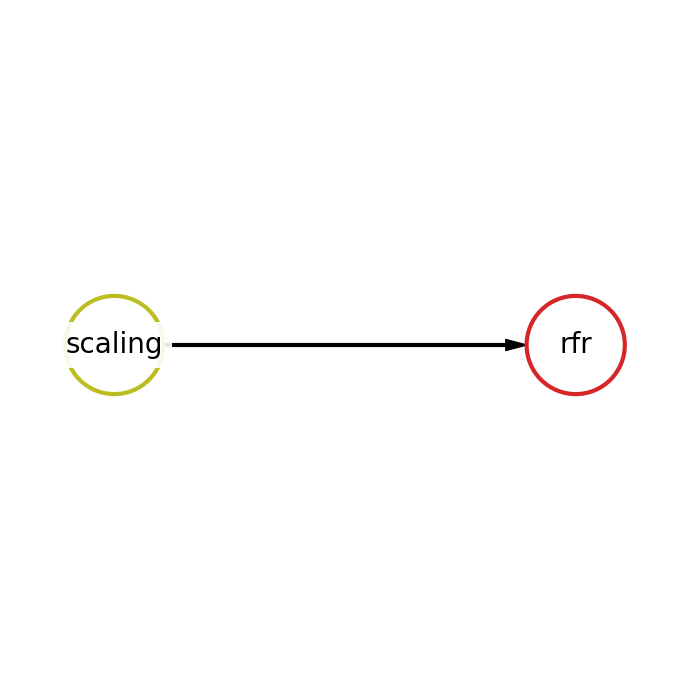

In [110]:
fedot_model = Fedot(problem='regression', timeout=1)

# Fit model
obtained_pipeline = fedot_model.fit(
    features=X_train, target=y_train)
obtained_pipeline.show()

# Make predictions
predict = fedot_model.predict(X_test)


In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(
    f"Оценка качества модели по метрике MAE: {mean_absolute_error(y_test, fedot_model.predict(X_test))}")
print(
    f"Оценка качества модели по метрике MSE: {mean_squared_error(y_test, fedot_model.predict(X_test))}")


Оценка качества модели по метрике MAE: 75.32648915836019
Оценка качества модели по метрике MSE: 13977.404691439691


Scatter plot

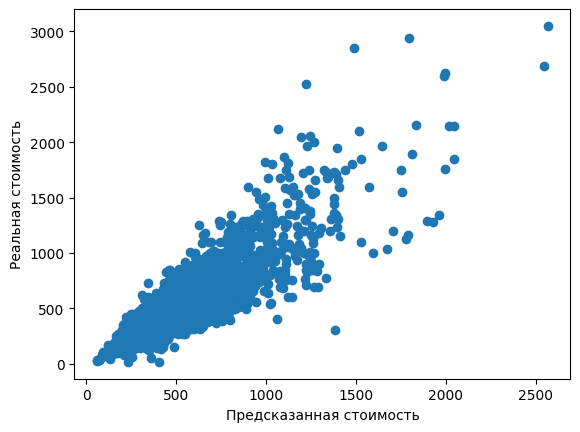

In [112]:
plt.scatter(fedot_model.predict(X_test), y_test)
plt.xlabel('Предсказанная стоимость')
plt.ylabel('Реальная стоимость')
plt.show()


Построение собственной модели

In [113]:
X = df2.drop(columns=['totalPrice'])
y = df2['totalPrice']


In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=15)


Используем RandomForestRegressor

In [115]:
# Fitting the Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators=100, random_state=0)
regressor_rf.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [116]:
print(
    f"Оценка качества модели по метрике MAE: {mean_absolute_error(y_test, regressor_rf.predict(X_test))}")
print(
    f"Оценка качества модели по метрике MSE: {mean_squared_error(y_test, regressor_rf.predict(X_test))}")


Оценка качества модели по метрике MAE: 74.21964245965609
Оценка качества модели по метрике MSE: 13666.714435316637


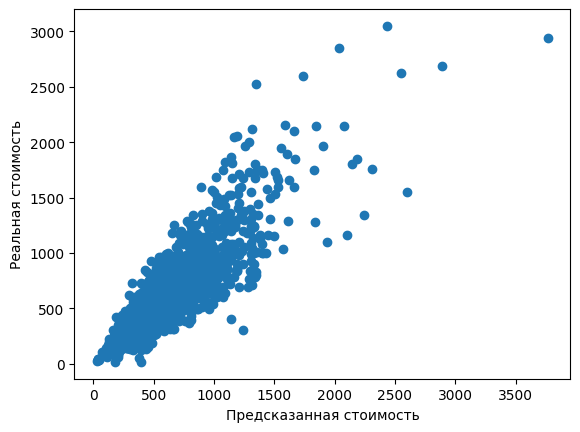

In [117]:
plt.scatter(regressor_rf.predict(X_test), y_test)
plt.xlabel('Предсказанная стоимость')
plt.ylabel('Реальная стоимость')
plt.show()


Видим что наша модель немного лучше